In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
Norma = "NSR-10"
Suelo = "E"
CoefImportancia = 1.0
Aa = 0.25
Av = 0.20
R = 5
H_total = 8.1 # m

In [6]:
if Norma == "NSR-10":    
    df_Fa = pd.read_excel("Tables NSR 10.xlsx", sheet_name="Tabla A.2.4-3_Fa", index_col=0)
    df_Fv = pd.read_excel("Tables NSR 10.xlsx", sheet_name="Tabla A.2.4-4_Fv", index_col=0)

    Fa = df_Fa.loc[Suelo, Aa]
    Fv = df_Fv.loc[Suelo, Av]

    T0 = 0.10 * (Av*Fv)/(Aa*Fa)
    Tc = 0.48 * (Av*Fv)/(Aa*Fa)
    Tl = 2.4*Fv

elif Norma == "MZSC-14":
    """
    Impementar lectura de tablas para MZSC-14
    """

    #df_Fa = pd.read_excel("Tables NSR 10.xlsx", sheet_name="MZSC-Espectro T corto", index_col=0)
    #df_Fv = pd.read_excel("Tables NSR 10.xlsx", sheet_name="MZSC-Espectro T largo", index_col=0)
    
    pass


In [7]:
def plot_espectro_nsr10(Aa, Av, Fa, Fv, T0, Tc, Tl, CoefImportancia, R, analisis_dinamico=False, tipo_espectro='diseño'):
    T = np.linspace(0, 8, 500)
    Sa = np.zeros_like(T)
    Sa1 = np.full_like(T, np.nan)  # Use NaN for no values

    # Espectro de Diseño NSR-10
    for i, t in enumerate(T):
        if t < Tc:
            Sa[i] = 2.5 * Aa * Fa * CoefImportancia
        elif t < Tl:
            Sa[i] = 1.2 * Av * Fv * CoefImportancia / t
        else:
            Sa[i] = 1.2 * Av * Fv * Tl * CoefImportancia / t**2
    
    plt.plot(T, Sa/R, label=f'Espectro de {tipo_espectro}')
    
    if analisis_dinamico:

        # En análisis dinámico, solo para modos diferentes al fundamental en cada dirección principal en planta
        for i, t in enumerate(T):
            if t < T0:
                Sa1[i] = 2.5 * Aa * Fa * CoefImportancia *(0.4 + 0.6*(t/T0))

        plt.plot(T, Sa1, label='Espectro de Diseño NSR-10', linestyle='--')

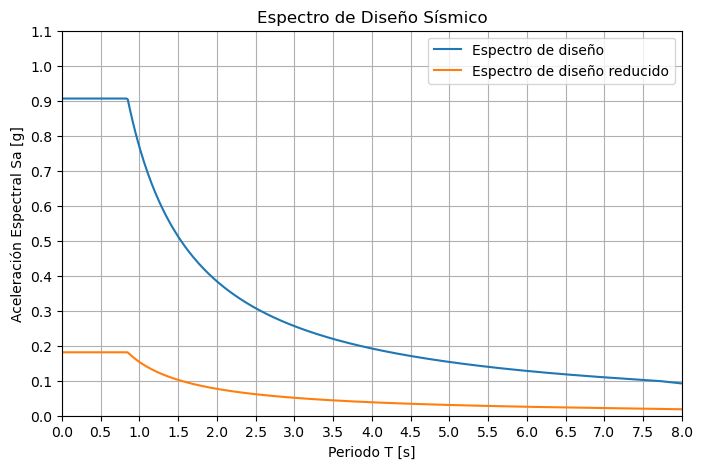

In [8]:
plt.figure(figsize=(8, 5))
plot_espectro_nsr10(Aa, Av, Fa, Fv, T0, Tc, Tl, CoefImportancia, 1, tipo_espectro='diseño')
plot_espectro_nsr10(Aa, Av, Fa, Fv, T0, Tc, Tl, CoefImportancia, R, tipo_espectro='diseño reducido')
plt.xlabel('Periodo T [s]')
plt.ylabel('Aceleración Espectral Sa [g]')
plt.title('Espectro de Diseño Sísmico')
plt.grid(True)
plt.legend()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.xlim(0, 8)
plt.ylim(0, 1.1)
plt.show()

In [9]:
Ta_df = pd.read_excel("Tables NSR 10.xlsx", sheet_name="Sistema estructural", index_col=0)

Sistema_estructural = "Pórticos de Concreto Resistente a Momento"
Ct = Ta_df.loc[Sistema_estructural, 'Ct']
a = Ta_df.loc[Sistema_estructural, 'a']

Ta = float(Ct * (H_total ** a))
Cu = max(1.2, 1.75-1.2*Av*Fv)
CuTa = Cu * Ta